In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
from IPython.display import display
pd.options.display.max_columns = None
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn import svm, datasets

In [2]:
df = pd.read_excel('heart_disease.xlsx')

In [3]:
df.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,0,0,0,23,1,0,0,1,1,1,1,1,0,1,0,0,0,0,8,5,8
1,0,0,0,1,26,0,0,0,1,1,1,0,1,0,1,0,1,0,1,4,5,8
2,0,0,0,1,21,1,0,0,1,1,1,0,1,0,1,8,0,0,0,6,6,8
3,0,0,0,1,33,0,0,0,1,1,1,0,1,0,2,0,0,0,1,9,6,8
4,0,0,0,1,23,0,0,0,1,1,1,0,1,0,1,7,0,0,0,8,6,8


In [4]:
df.shape

(52909, 22)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52909 entries, 0 to 52908
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   HeartDiseaseorAttack  52909 non-null  int64
 1   HighBP                52909 non-null  int64
 2   HighChol              52909 non-null  int64
 3   CholCheck             52909 non-null  int64
 4   BMI                   52909 non-null  int64
 5   Smoker                52909 non-null  int64
 6   Stroke                52909 non-null  int64
 7   Diabetes              52909 non-null  int64
 8   PhysActivity          52909 non-null  int64
 9   Fruits                52909 non-null  int64
 10  Veggies               52909 non-null  int64
 11  HvyAlcoholConsump     52909 non-null  int64
 12  AnyHealthcare         52909 non-null  int64
 13  NoDocbcCost           52909 non-null  int64
 14  GenHlth               52909 non-null  int64
 15  MentHlth              52909 non-null  int64
 16  Phys

In [6]:
df.isnull().sum()

HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

# EDA

In [7]:
df.describe()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,52909.000000,52909.000000,52909.000000,52909.000000,52909.000000,52909.000000,52909.000000,52909.000000,52909.000000,52909.000000,52909.000000,52909.000000,52909.000000,52909.000000,52909.000000,52909.000000,52909.000000,52909.000000,52909.000000,52909.000000,52909.000000,52909.000000
mean,0.451587,0.554972,0.532631,0.972783,28.724697,0.509025,0.088662,0.450472,0.710125,0.618553,0.797464,0.050313,0.958495,0.095655,2.872082,3.795025,6.253983,0.266023,0.494491,8.786804,4.919541,5.597157
std,0.497655,0.496974,0.498939,0.162715,6.425036,0.499923,0.284257,0.822464,0.453709,0.485747,0.401894,0.218592,0.199457,0.294120,1.151112,8.255086,10.414028,0.441880,0.499974,2.968093,1.034855,2.215142
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,0.000000,1.000000,1.000000,1.000000,28.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,32.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,4.000000,2.000000,7.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


<AxesSubplot:xlabel='HeartDiseaseorAttack', ylabel='count'>

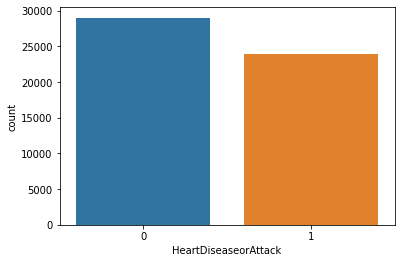

In [8]:
sns.countplot(data =df , x ='HeartDiseaseorAttack')

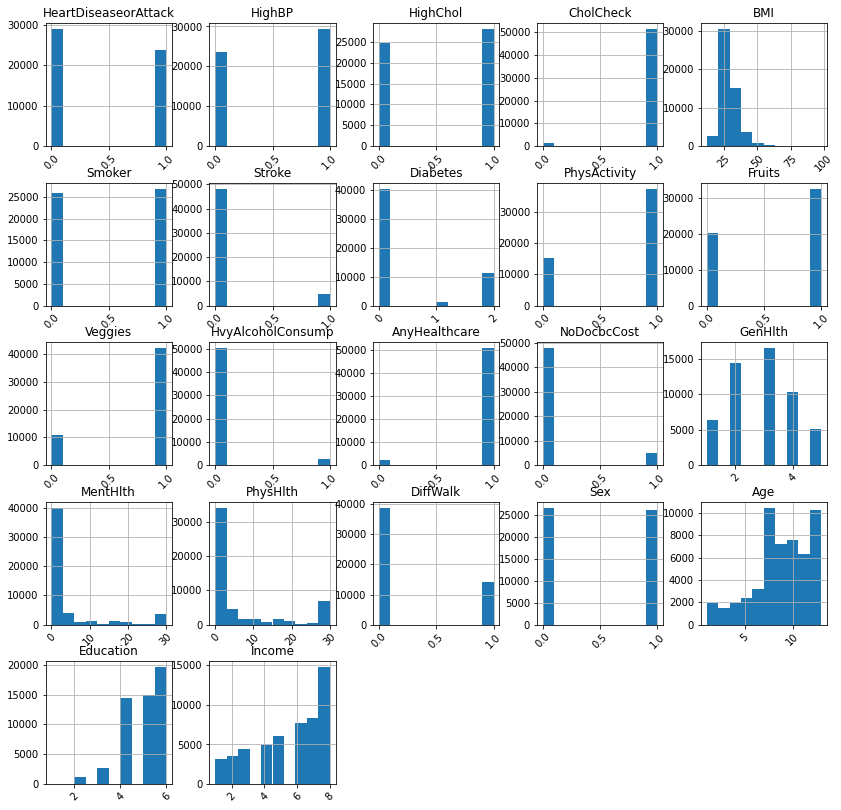

In [9]:
df.hist(figsize=(14,14), xrot=45)
plt.show()

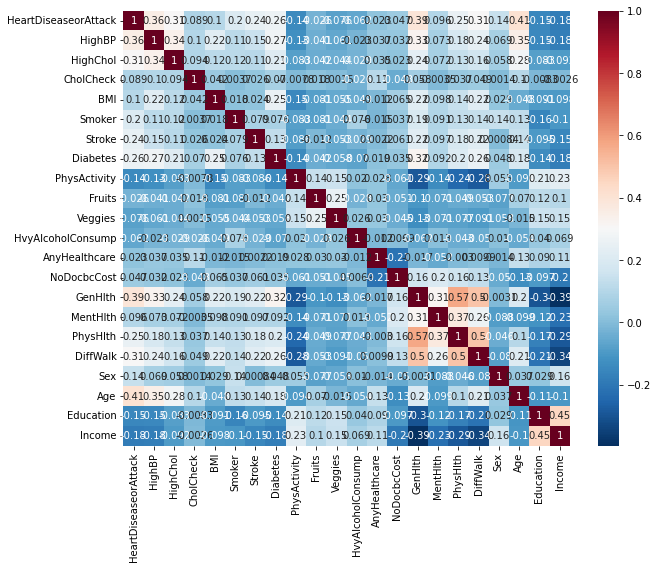

In [10]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap='RdBu_r', annot=True)
plt.show()

In [11]:
X = df.drop('HeartDiseaseorAttack',axis=1)

y = df['HeartDiseaseorAttack']

# Without PCA

In [12]:
# importing train_test_split from sklearn
from sklearn.model_selection import train_test_split
# splitting the data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

In [13]:
x_train.shape

(42327, 21)

In [14]:
from sklearn.svm import SVC
svm = SVC(C=0.1, gamma = 1, kernel = "linear")
svm.fit(x_train,y_train)

svm.score(x_test,y_test)

0.7714987714987716

# With PCA

In [15]:
from sklearn.decomposition import PCA
pca = PCA(0.95)
#pca=PCA(n_components=15) 

In [16]:
pca.fit(X) 
X_pca=pca.transform(X) 
#let's check the shape of X_pca array
print("shape of X_pca", X_pca.shape)

shape of X_pca (52909, 4)


In [17]:
pca.explained_variance_ratio_

array([0.54268455, 0.21520652, 0.16916429, 0.03678697])

In [18]:
X_recovered = pca.inverse_transform(X_pca)

In [19]:
X_recovered.shape

(52909, 21)

In [20]:
X_recovered

array([[ 0.33704216,  0.3840961 ,  0.95780599, ...,  7.5861662 ,
         5.18914936,  6.41016631],
       [ 0.14759776,  0.2210196 ,  0.94043614, ...,  3.73581158,
         5.38571159,  6.96023928],
       [ 0.20073291,  0.2967758 ,  0.94340624, ...,  5.56986288,
         5.25488735,  6.4252599 ],
       ...,
       [ 0.45678643,  0.47475528,  0.96766399, ...,  8.98023202,
         5.03113899,  5.91554132],
       [ 0.79969858,  0.71780955,  0.99512714, ..., 12.86718188,
         4.74612154,  5.2781967 ],
       [ 0.51418909,  0.51432671,  0.97220166, ...,  9.73154962,
         5.01513862,  5.95480066]])

In [21]:
# importing train_test_split from sklearn
from sklearn.model_selection import train_test_split
# splitting the data
x_train, x_test, y_train, y_test = train_test_split(X_pca, y, test_size = 0.2, random_state = 100)

In [22]:
x_train.shape

(42327, 4)

In [23]:
from sklearn.svm import SVC
svm = SVC(C=0.1, gamma = 1, kernel = "linear")
svm.fit(x_train,y_train)

svm.score(x_test,y_test)

0.7175392175392176

In [ ]:
pipe = Pipeline([('classifier' , SVC())])

# Create param grid.

param_grid = [
    {'classifier' : [LogisticRegression()],
     'classifier__penalty' : ['l1', 'l2'],
    'classifier__C' : np.linspace(1, 10, 20),
    'classifier__solver' : ['liblinear']},
    {'classifier' : [GradientBoostingClassifier()],
    'classifier__n_estimators' : list(range(10,101,10)),
     'classifier__learning_rate' : np.linspace(0.1, 10, 50)},
     {'classifier' : [GaussianNB()],'classifier__var_smoothing' :np.linspace(0.0000001, 0.001,4)},
    {'classifier' : [RandomForestClassifier()],
    'classifier__n_estimators' : list(range(10,101,10)),
     'classifier__max_depth' : list(range(5,20,5))},
    {'classifier' : [DecisionTreeClassifier()],
     'classifier__max_depth' : list(range(5,20,5))},
    {'classifier' : [KNeighborsClassifier()],
     'classifier__n_neighbors' : list(range(2,10,1))},
    {'classifier' : [SVC()],
         'classifier__C' : np.linspace(0.1, 10, 20),
    'classifier__kernel' : ['linear', 'poly', 'rbf']}
    

   
]

# Create grid search object

clf = GridSearchCV(pipe, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)

# Fit on data

best_clf = clf.fit(x_train, y_train)

In [ ]:
best_clf.best_estimator_.get_params()['classifier']

In [ ]:
grid_predictions = best_clf.predict(X_test) 

In [ ]:
print('Model accuracy is',best_clf.score(X_test, y_test))